# Topic Modeling on newsgroups

## Topic Modeling - Attempt #1 (All Text)

In [330]:
import pandas as pd
df_news = pd.read_csv("newsgroups2.csv") 
df_news.text=df_news.text.astype(str)

In [294]:
df_news

,text,category
0,"\nWhat I mean is what I said. ""What I want"" ...",0
1,What worked for me on my RD350 was to lean tow...,2
2,The honest answer to your question about Arabs...,4
3,\n\n _The_ problem with Oort cloud source...,3
4,"\nI too am a Jules Verne collector, and can te...",3
...,...,...
1867,\nDream machine quality ain't what it used to ...,2
1868,"\n""Society"" is impossible without some shared ...",4
1869,Mike Adams suggested discussions on long-term ...,3
1870,\nAh! Excellent. So why doesn't she appear to ...,0


In [331]:
import nltk
nltk.download('stopwords')

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text_1(text):
    # Lowercase
    text = text.lower()
    # Remove email addresses
    text = re.sub('\S*\@\S*', '', text)    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove numbers
    text = re.sub('\d', '', text)    
    # Remove quotes
#    text = re.sub('[‘’“”…]', '', text)
    # Remove new line \n 
    text = re.sub('\n', ' ', text)
    # Remove stop_word
    stop_words = stopwords.words('english')
    words = word_tokenize(text)
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mausoto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [332]:
# Let's take a look at the updated text
df_news_clean = pd.DataFrame(df_news.text.apply(clean_text_1))

In [333]:
df_news_clean

,text
0,mean said want automatically translate think ...
1,worked rd lean towards dog modulated throttle...
2,honest answer question arabs expelled jaffa a...
3,problem oort cloud sources absolutely plausib...
4,jules verne collector tell though tough find ...
...,...
1867,dream machine quality aint used kinetic art g...
1868,society impossible without shared set moralit...
1869,mike adams suggested discussions longterm eff...
1870,ah excellent doesnt appear im little weak bli...


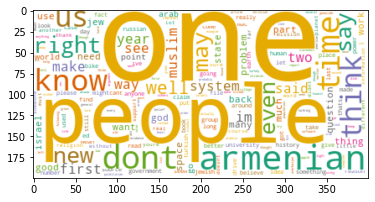

In [334]:
import matplotlib.pyplot as plt
%matplotlib inline  
from wordcloud import WordCloud

alltext=''
for index,row in df_news_clean.iterrows():
    alltext=alltext+row.text

wc = WordCloud(collocations=False, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate(alltext)
plt.imshow(wc, interpolation="bilinear")

plt.show()


In [335]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

def lemmatize(text):
    wnl = WordNetLemmatizer()
    lemma=[]
    for i in word_tokenize(text):
        if len(i) > 3:
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)


def lemmatize_tag(text):
    wnl = WordNetLemmatizer()
    lemma=[]
    for i,j in pos_tag(word_tokenize(text)) :
        p=j[0].lower()
        if p in ['j','n','v']:
            if p == 'j':
                p = 'a'
            lemma.append(wnl.lemmatize(i,p))
        else :
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)


In [336]:
data_clean = pd.DataFrame(df_news_clean.text.apply(lemmatize))

In [337]:
data_clean=df_news_clean

In [338]:
data_clean

,text
0,mean said want automatically translate think ...
1,worked rd lean towards dog modulated throttle...
2,honest answer question arabs expelled jaffa a...
3,problem oort cloud sources absolutely plausib...
4,jules verne collector tell though tough find ...
...,...
1867,dream machine quality aint used kinetic art g...
1868,society impossible without shared set moralit...
1869,mike adams suggested discussions longterm eff...
1870,ah excellent doesnt appear im little weak bli...


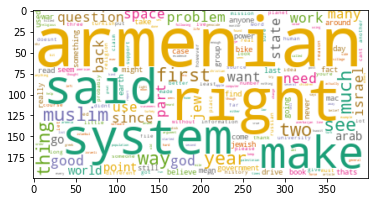

In [340]:
stop_words = stopwords.words('english')
stop_words2=[]

for w in stop_words:
    stop_words2.append(w)

stop_words2.extend(['would','know','dont','like','people','time','get',
                    'say','may','could','also','well','new','even','nan','one','us','think','im'])

#stop_words2.extend(['know','well','also','dont','one','would','could','many','may','think'])

alltext=''
for index,row in data_clean.iterrows():
    alltext=alltext+row.text

wc = WordCloud(collocations=False,stopwords=stop_words2, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate(alltext)
plt.imshow(wc, interpolation="bilinear")

plt.show()


## LSA



In [341]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words2)
data_cv = cv.fit_transform(data_clean.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aa,aac,aacs,aah,aam,aap,aarguing,aaroundpluto,ab,ababa,...,zuma,zumabots,zumrut,zur,zvai,zvezdny,zwischen,zx,zyxel,ÿhooked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [342]:
from sklearn.feature_extraction.text import TfidfVectorizer

#stop_words = stopwords.words('english')
#stop_words2=[]

#for w in stop_words:
#    stop_words2.append(w)


vectorizer = TfidfVectorizer(stop_words=stop_words2,min_df=2)#, max_df=.98)
tfidf = vectorizer.fit_transform(data_clean.text)
len(vectorizer.get_feature_names())

11385

In [343]:
data_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
data_tfidf.index = data_clean.index
data_tfidf

,aa,aap,ab,ababa,abandon,abandoned,abbreviations,abc,abdullah,abhor,...,zionists,zipper,zivin,zodiacal,zohar,zone,zones,zur,zwischen,zx
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.114988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1868,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1869,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1870,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [344]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=8)

svd_model.fit(data_tfidf)

print(svd_model.components_.shape)
print(svd_model.singular_values_)


(8, 11385)
[5.01546262 3.23457341 2.8761498  2.69198997 2.59323517 2.49261601
 2.46980736 2.3694899 ]


In [345]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print("%.2f*%s "% (t[1], t[0]) ,end='')
    print("")

Topic 0: 
0.10*right 0.10*way 0.09*much 0.09*good 0.09*bike 0.09*see 0.09*want 
Topic 1: 
0.23*armenian 0.20*armenians 0.16*muslims 0.14*muslim 0.14*jews 0.12*israel 0.11*turkish 
Topic 2: 
0.27*armenian 0.23*armenians 0.20*mhz 0.17*mac 0.15*monitor 0.14*apple 0.13*turkish 
Topic 3: 
0.42*bike 0.15*armenian 0.12*armenians 0.12*riding 0.12*ride 0.11*dod 0.09*back 
Topic 4: 
0.23*space 0.23*hst 0.23*shuttle 0.19*mission 0.15*orbit 0.13*system 0.11*solar 
Topic 5: 
0.38*israel 0.20*jews 0.18*arab 0.18*arabs 0.15*jewish 0.13*israeli 0.10*palestinians 
Topic 6: 
0.67*mhz 0.22*clock 0.21*speed 0.13*hst 0.11*cpu 0.11*shuttle 0.10*centris 
Topic 7: 
0.43*muslims 0.35*serbs 0.34*bosnian 0.23*croats 0.17*bosnia 0.13*muslim 0.13*yugoslavia 


## LDA

In [346]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words2,min_df=2)#, max_df=.9)
data_cv = cv.fit_transform(data_clean.text)
data = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data.index = data_clean.index
data

,aa,aap,ab,ababa,abandon,abandoned,abbreviations,abc,abdullah,abhor,...,zionists,zipper,zivin,zodiacal,zohar,zone,zones,zur,zwischen,zx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [347]:
from gensim import matutils, models
import scipy.sparse


In [348]:
tdm = data.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ababa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [349]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [350]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [351]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=6)
lda.print_topics()

[(0,
  '0.003*"much" + 0.003*"see" + 0.003*"system" + 0.003*"said" + 0.003*"way" + 0.003*"first" + 0.002*"god" + 0.002*"two" + 0.002*"something" + 0.002*"make"'),
 (1,
  '0.003*"said" + 0.003*"go" + 0.003*"first" + 0.002*"armenian" + 0.002*"back" + 0.002*"see" + 0.002*"way" + 0.002*"use" + 0.002*"system" + 0.002*"university"'),
 (2,
  '0.003*"said" + 0.003*"armenian" + 0.003*"right" + 0.003*"armenians" + 0.003*"since" + 0.002*"space" + 0.002*"good" + 0.002*"many" + 0.002*"way" + 0.002*"need"'),
 (3,
  '0.003*"ed" + 0.003*"many" + 0.003*"space" + 0.003*"good" + 0.002*"see" + 0.002*"first" + 0.002*"armenian" + 0.002*"system" + 0.002*"way" + 0.002*"since"'),
 (4,
  '0.003*"back" + 0.003*"said" + 0.002*"much" + 0.002*"ca" + 0.002*"adl" + 0.002*"two" + 0.002*"make" + 0.002*"see" + 0.002*"way" + 0.002*"israel"'),
 (5,
  '0.003*"two" + 0.003*"system" + 0.003*"first" + 0.002*"back" + 0.002*"part" + 0.002*"armenian" + 0.002*"said" + 0.002*"university" + 0.002*"way" + 0.002*"armenians"')]

## Topic Modeling - Attempt #2 (Nouns Only)

In [353]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [354]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(df_news_clean.text.apply(nouns))
data_nouns

,text
0,mean think translate way reply kill means tran...
1,towards dog ankle seconds pipe shoulder face s...
2,answer question arabs jaffa andor jaffa return...
3,problem oort cloud sources mechanism physics o...
4,jules collector eyes time books area book stor...
...,...
1867,dream machine quality aint art paint jobs dont
1868,society set moralities action foundation somet...
1869,mike adams discussions effects love topic regu...
1870,doesnt department oh something dog races visio...


In [318]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

add_stop_words = []
#add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
#                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words2, min_df=5)#, min_df=.1, max_df=.9)
data_cvn = cvn.fit_transform(data_nouns.text)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aa,ability,absence,academy,acceleration,accelerator,access,accessories,account,accounts,...,youd,youll,youre,youth,youve,yugoslavia,zionism,zionist,zionists,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1869,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [319]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [321]:
# Let's start with  topics
ldan = models.LdaModel(corpus=corpusn, num_topics=8, id2word=id2wordn,passes=20)
ldan.print_topics()

[(0,
  '0.012*"power" + 0.012*"muslims" + 0.009*"bike" + 0.008*"rights" + 0.007*"energy" + 0.007*"religion" + 0.007*"croats" + 0.006*"fact" + 0.006*"things" + 0.006*"way"'),
 (1,
  '0.010*"didnt" + 0.009*"door" + 0.009*"children" + 0.009*"way" + 0.008*"anyone" + 0.007*"bike" + 0.007*"launch" + 0.007*"day" + 0.007*"dog" + 0.007*"someone"'),
 (2,
  '0.022*"armenians" + 0.016*"university" + 0.016*"history" + 0.011*"professor" + 0.010*"jews" + 0.008*"religion" + 0.008*"children" + 0.007*"culture" + 0.007*"party" + 0.007*"claim"'),
 (3,
  '0.024*"system" + 0.012*"mac" + 0.011*"problem" + 0.011*"drive" + 0.011*"software" + 0.011*"apple" + 0.011*"disk" + 0.009*"work" + 0.009*"theism" + 0.008*"problems"'),
 (4,
  '0.021*"space" + 0.012*"system" + 0.011*"years" + 0.011*"spacecraft" + 0.010*"earth" + 0.009*"planets" + 0.009*"miles" + 0.008*"degrees" + 0.007*"moon" + 0.007*"mission"'),
 (5,
  '0.016*"istanbul" + 0.013*"office" + 0.010*"university" + 0.010*"york" + 0.009*"ankara" + 0.008*"informat

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [355]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [278]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.text.apply(nouns_adj))
data_nouns_adj

,text
0,mean translate think right translate way reply...
1,rd lean towards dog throttle keep ankle teeth ...
2,honest answer question arabs jaffa andor jaffa...
3,problem oort cloud sources plausible mechanism...
4,jules verne collector tough keep eyes open tim...
...,...
1867,dream machine quality aint kinetic art great p...
1868,society impossible set moralities god bad acti...
1869,mike adams discussions longterm effects human ...
1870,ah excellent doesnt im little weak faith depar...


In [280]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words2, min_df=5)
data_cvna = cvna.fit_transform(data_nouns_adj.text)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aa,ability,able,absence,absolute,abstract,absurd,academy,acceleration,accelerator,...,youll,young,youre,youth,youve,yugoslavia,zionism,zionist,zionists,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1869,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [290]:
# Let's start with 5 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=id2wordna, passes=30)
ldana.print_topics()

[(0,
  '0.013*"armenian" + 0.010*"armenians" + 0.009*"jews" + 0.008*"history" + 0.008*"government" + 0.007*"university" + 0.007*"turkish" + 0.007*"jewish" + 0.006*"war" + 0.006*"children"'),
 (1,
  '0.008*"god" + 0.007*"israel" + 0.006*"way" + 0.006*"religion" + 0.006*"point" + 0.005*"many" + 0.005*"something" + 0.005*"right" + 0.005*"evidence" + 0.005*"true"'),
 (2,
  '0.008*"space" + 0.007*"good" + 0.007*"bike" + 0.007*"power" + 0.006*"way" + 0.005*"ive" + 0.005*"drive" + 0.005*"anyone" + 0.005*"monitor" + 0.005*"much"'),
 (3,
  '0.009*"space" + 0.009*"solar" + 0.008*"mission" + 0.008*"earth" + 0.008*"system" + 0.008*"spacecraft" + 0.007*"armenian" + 0.007*"launch" + 0.006*"planets" + 0.006*"miles"'),
 (4,
  '0.017*"system" + 0.011*"mac" + 0.010*"list" + 0.009*"software" + 0.009*"disk" + 0.008*"ed" + 0.008*"istanbul" + 0.008*"mhz" + 0.008*"apple" + 0.007*"files"')]

## Identify Topics in Each Document

In [356]:
corpus_transformed = ldana[corpusna]


In [357]:
list(corpus_transformed)

[[(0, 0.020171752),
  (1, 0.9191512),
  (2, 0.020454159),
  (3, 0.020076158),
  (4, 0.020146731)],
 [(0, 0.013409647),
  (1, 0.08921185),
  (2, 0.87046707),
  (3, 0.013560493),
  (4, 0.013350929)],
 [(0, 0.26898673), (1, 0.7153294)],
 [(4, 0.9920993)],
 [(1, 0.25527364), (2, 0.73508143)],
 [(0, 0.050206076),
  (1, 0.25714102),
  (2, 0.5904539),
  (3, 0.051219113),
  (4, 0.0509799)],
 [(0, 0.03343143),
  (1, 0.03360013),
  (2, 0.6386017),
  (3, 0.033412404),
  (4, 0.26095432)],
 [(2, 0.8698653), (4, 0.113333166)],
 [(2, 0.90939313), (3, 0.045479793), (4, 0.03589208)],
 [(1, 0.96721524)],
 [(2, 0.5013739), (3, 0.48205322)],
 [(2, 0.3204644), (3, 0.15947494), (4, 0.5064892)],
 [(0, 0.05003726),
  (1, 0.54975754),
  (2, 0.051322024),
  (3, 0.050038923),
  (4, 0.29884428)],
 [(2, 0.628382), (4, 0.34495458)],
 [(0, 0.0107371025),
  (1, 0.6401572),
  (2, 0.010885952),
  (3, 0.3274584),
  (4, 0.010761345)],
 [(0, 0.014428967),
  (1, 0.014574173),
  (2, 0.50531477),
  (3, 0.45126712),
  (4, 0.0

In [358]:
topic_prediction=[]
for j in list(corpus_transformed):
    main_topic=j[0][0]
    weigth=j[0][1]
    for t,w in j:
        if w > weigth :
            main_topic=t
            weigth=w
    topic_prediction.append(main_topic)


In [359]:
topic_prediction

[1,
 2,
 1,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 4,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 4,
 2,
 4,
 3,
 4,
 4,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 4,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 3,
 0,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 4,
 2,
 3,
 0,
 2,
 3,
 2,
 1,
 1,
 0,
 2,
 3,
 2,
 2,
 2,
 4,
 1,
 4,
 2,
 4,
 1,
 1,
 2,
 0,
 0,
 2,
 4,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 4,
 2,
 0,
 1,
 2,
 4,
 3,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 4,
 1,
 2,
 2,
 4,
 0,
 2,
 1,
 0,
 2,
 2,
 4,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 4,
 1,
 0,
 1,
 3,
 0,
 4,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 3,
 4,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 3,
 3,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 0,
 4,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 4,
 2,
 1,
 1,
 2,
 4,
 1,
 2,
 4,
 1,
 1,
 4,
 4,
 2,
 4,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 3,
 0,
 3,
 1,
 4,
 1,
 4,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 4,


In [327]:
df_news.category

0       0
1       2
2       4
3       3
4       3
       ..
1867    2
1868    4
1869    3
1870    0
1871    3
Name: category, Length: 1872, dtype: int64

In [360]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_news.category,topic_prediction)

array([[ 28, 237,  35,   9,  10],
       [ 15,  10, 183,   3, 174],
       [ 28,  51, 274,  13,  32],
       [ 36,  43, 165, 112,  38],
       [154, 188,  18,   9,   7]])

In [124]:
 ['alt.atheism',  'comp.sys.mac.hardware', 'rec.motorcycles',  'sci.space',  'talk.politics.mideast',